In [2]:
import os 
import pandas as pd 
import numpy as np 
import csv 
# ------------------------------------------
## set path 
###### IMPORTANT: ARE WE CONSTRAINING MEANS ONLY? FALSE IF NO, TRUE IF YES! 
constraint_mu_only = False 


on_mac = False
on_thinkpad = False 
on_hpg = True

if on_mac == True: 
    data_path = "/Volumes/hodaakl/"
#     spec_folder_onServer = data_path + 'Max/'
if on_thinkpad== True: 
    data_path = "//exasmb.rc.ufl.edu/blue/pdixit/hodaakl/"
if on_hpg == True: 
    data_path = "/blue/pdixit/hodaakl/"

# specify the project you are working on   
spec_folder_onServer = data_path + 'A5MCMC_IGF_FoxO/'
# path = spec_folder_onServer + '0211_test1/'
# # ------------------------------------------

# if not os.path.exists(path): 
#     os.mkdir(path)
# else: 
#     raise ValueError("folder already exists, can't initialize lambda")
# # ------------------------------------------

read_dictionary = np.load(spec_folder_onServer + 'Arrays_for_max_ent/cons_dict_mu_lnx_fraclr_020322.npy',allow_pickle='TRUE').item()
real_cons = read_dictionary['array']
nCons = len(real_cons)
print('length of constraints array = ', nCons)
Lambda_init = np.ones(nCons)*10**( - np.floor(np.log10(real_cons)) - 1)
# Lambda_init[int(nCons/2):] = Lambda_init[int(nCons/2):]*100
print(Lambda_init)


length of constraints array =  112
[0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1
 0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1
 0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.   ]


In [8]:

# specify the project you are working on   
spec_folder_onServer = data_path + 'A5MCMC_IGF_FoxO/'
path = spec_folder_onServer + '0214_newlinit3/'
# ------------------------------------------

if not os.path.exists(path): 
    os.mkdir(path)
else: 
    raise ValueError("folder already exists, can't initialize lambda")
# # ------------------------------------------

# Full_lambda_init = np.zeros(len(real_cons))
# Full_lambda_init[int(len(real_cons)/2):] = np.ones(int(len(real_cons)/2))*10**(-6)
# Full_lambda_init[int(len(real_cons)/2):] = -2*np.ones(int(len(real_cons)/2))
# if constraint_mu_only == True: 
#     nCons = int(nCons/2)
    
# else: 
#     nCons = full_con_num

# Lambda_init = Full_lambda_init[:nCons]
# save that lambda init 
# ------------------------------------------


file_name_lambda =path+ 'Lambdas.csv'
with open(file_name_lambda, 'w') as new_file_lambda:
    csv_writer_lambda = csv.writer(new_file_lambda, delimiter = ',')
    csv_writer_lambda.writerow(Lambda_init)
    new_file_lambda.flush()

print(f'Saved initial lambda: of length {len(Lambda_init)}')
print(f'lambda = {Lambda_init}')



Saved initial lambda: of length 112
lambda = [1.e-03 1.e-03 1.e-03 1.e-03 1.e-03 1.e-03 1.e-03 1.e-03 1.e-03 1.e-03
 1.e-03 1.e-03 1.e-03 1.e-03 1.e-03 1.e-03 1.e-03 1.e-03 1.e-03 1.e-03
 1.e-03 1.e-03 1.e-03 1.e-03 1.e-03 1.e-03 1.e-03 1.e-03 1.e-01 1.e-01
 1.e-01 1.e-01 1.e-01 1.e-01 1.e-01 1.e-01 1.e-01 1.e-01 1.e-01 1.e-01
 1.e-01 1.e-01 1.e-01 1.e-01 1.e-01 1.e-01 1.e-01 1.e-01 1.e-01 1.e-01
 1.e-01 1.e-01 1.e-01 1.e-01 1.e-01 1.e-01 1.e+02 1.e+02 1.e+02 1.e+02
 1.e+02 1.e+02 1.e+02 1.e+02 1.e+02 1.e+02 1.e+02 1.e+02 1.e+02 1.e+02
 1.e+02 1.e+02 1.e+02 1.e+02 1.e+02 1.e+02 1.e+02 1.e+02 1.e+02 1.e+02
 1.e+02 1.e+02 1.e+02 1.e+02 1.e+02 1.e+02 1.e+02 1.e+02 1.e+02 1.e+02
 1.e+02 1.e+02 1.e+02 1.e+02 1.e+02 1.e+02 1.e+02 1.e+02 1.e+02 1.e+02
 1.e+02 1.e+02 1.e+02 1.e+02 1.e+02 1.e+02 1.e+02 1.e+02 1.e+02 1.e+02
 1.e+02 1.e+02]


### Run MCMC 

In [20]:
import numpy as np
# import random
import matplotlib.pyplot as plt
import time
import os
# import csv
import pandas as pd
from MCMCFunctions import RunMCMC



# ------------------------------------------

## set path 
on_mac = False
on_thinkpad = False 
on_hpg = True

if on_mac == True: 
    data_path = "/Volumes/hodaakl/"
if on_thinkpad== True: 
    data_path = "//exasmb.rc.ufl.edu/blue/pdixit/hodaakl/"
if on_hpg == True: 
    data_path = "/blue/pdixit/hodaakl/"

# specify the project you are working on     
spec_folder_onServer = data_path + 'A5MCMC_IGF_FoxO/'
path = spec_folder_onServer + '0214_newlinit/'

# ------------------------------------------

file_name_lambda = path + 'Lambdas.csv'

if os.path.exists(file_name_lambda): 
    print('Fetching lambda')
    df_lambdas = pd.read_csv(file_name_lambda, sep = ',', header = None) 
    data_lambdas = df_lambdas.to_numpy()
    iteration, _ = data_lambdas.shape
    iteration = iteration -1
    Lambda = data_lambdas[-1,:]
else:
    print('lambda file doesnt exist')
# load the lagrange multipliers 
#
# load the xlimits 
# 
xlimdict = np.load(spec_folder_onServer + 'Arrays_for_max_ent/XLimDict_25_75_020322.npy',allow_pickle='TRUE').item()
x25 = xlimdict['x25']
x75 = xlimdict['x75']

#
#
print(f'iteration {iteration}')
print()
RunMCMC(outpath = path,Lagrange_multi = Lambda,N_chain=200, ignore_steps=5, save_step = 2, iteration = iteration, param_range = 0.05, percentile_constraint_left=x25, percentile_constraint_right=x75, num_par_change = 5)

# 10285# for two hours do this ignore_steps=20, save_step = 50, iteration = iteration, param_range = 0.07, percentile_constraint_left=x25, percentile_constraint_right=x75)


Fetching lambda
iteration 5

iteration 5
MCMC for each step in iteration 5 took 0.55
acceptance ratio = 0.745
parameter rejected because of flag ratio = 0.0
MCMC done


### Updating lagrange multipliers 

length of constraints array =  112
saved figure


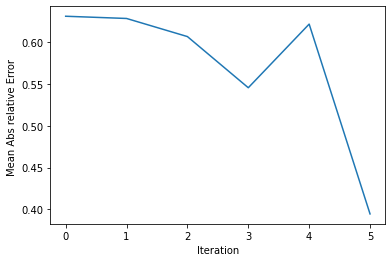

In [21]:
import csv
import numpy as np 
import random
import time
# sve_ivp
import os
import pandas as pd
from Update_LM_functions import calculate_constraints, update_lambda, openfile

on_mac = False
on_thinkpad = False 
on_hpg = True

if on_mac == True: 
    data_path = "/Volumes/hodaakl/"
if on_thinkpad== True: 
    data_path = "//exasmb.rc.ufl.edu/blue/pdixit/hodaakl/"
if on_hpg == True: 
    data_path = "/blue/pdixit/hodaakl/"

# specify the project you are working on     
spec_folder_onServer = data_path + 'A5MCMC_IGF_FoxO/'
path = spec_folder_onServer + '0214_newlinit/'
# ------------------------------------------

file_name_lambda = path + 'Lambdas.csv'
file_name_error = path+ 'Errors.csv'
read_dictionary = np.load(spec_folder_onServer + 'Arrays_for_max_ent/cons_dict_mu_lnx_fraclr_020322.npy',allow_pickle='TRUE').item()
real_cons = read_dictionary['array']

if not os.path.exists(file_name_lambda): 

    raise ValueError("No saved Lagrange multipliers, nothing to update. You have to save initial Lagrange multipliers first")
    
Lambda_np = openfile(file_name_lambda)

iterationp1, _ = Lambda_np.shape
iteration = iterationp1 -1

#
moments_filename =path + f'cellpreds_{iteration}.csv'


df = pd.read_csv(moments_filename, sep = ',', header = None) 

Data_np = df.to_numpy()
### take away the nan values 
idxn = np.argwhere(np.isnan(Data_np))
idx_nan_rows = idxn[:,0]

data = np.delete(Data_np,idx_nan_rows, 0)
Preds = calculate_constraints(data)


Error = Preds - real_cons[:len(Preds)]
Old_Lambda = Lambda_np[-1,:]
# alpha_arr = 10**(-np.log10(Preds) -1 )
ncons = len(real_cons)


mumu_data = np.mean(real_cons[:int(ncons/4)])
mulnx_data = np.mean(real_cons[int(ncons/4):int(ncons/2)])
mu_per = .25
# print(mumu_data)
# print(mus_data)
norm_vec = np.ones(len(real_cons))*mu_per
norm_vec[:int(len(real_cons)/4)] = norm_vec[:int(len(real_cons)/4)]*mumu_data
norm_vec[int(len(real_cons)/4):int(len(real_cons)/2)] = norm_vec[int(len(real_cons)/4):int(len(real_cons)/2)]*mulnx_data

nCons = len(real_cons)
print('length of constraints array = ', nCons)
alpha = np.ones(Lambda_np.shape[1])*10**( - np.floor(np.log10(real_cons)) - 2)


##
# amu = np.ones(int(ncons/4))*10**(-2) #before was 10**-1
# aln = np.ones(int(ncons/4))# before was *10
# ap = np.ones(int(ncons/2)) # *10 the lagrange multipliers are spiking 
# alpha = np.concatenate((amu, aln, ap), axis = 0)
# alpha
# alpha =np.concatenate( (np.ones(int(len(real_cons)/2))*10**(-1), np.ones(int(len(real_cons)/2))*10), axis = 0)
Lambda = update_lambda(Error = Error, old_lambda= Old_Lambda, norm_vector= norm_vec, alpha_cons = alpha)#, alpha_power = alpha_power) 

Lambda= Lambda.tolist()
Error = Error.tolist()


# ------------------------------------------
#write the result 


if os.path.exists(file_name_error): 
    with open(file_name_error, 'a') as add_file_error:
        csv_adder_error = csv.writer(add_file_error, delimiter = ',')
        csv_adder_error.writerow(Error)
        add_file_error.flush()
else:
    with open(file_name_error, 'w') as new_file_error:

        csv_writer_error = csv.writer(new_file_error, delimiter = ',')
#         csv_writer_pars.writerow(Par_fieldnames)
        csv_writer_error.writerow(Error)
        new_file_error.flush()
    
#################################################### Storing the Lambda  

if os.path.exists(file_name_lambda): 
    with open(file_name_lambda, 'a') as add_file_lambda:
        csv_adder_lambda = csv.writer(add_file_lambda, delimiter = ',')
        csv_adder_lambda.writerow(Lambda)
        add_file_lambda.flush()
else:
    print('trouble loading file')


############################################# Plotting
import matplotlib.pyplot as plt
if os.path.isdir(path+'figs')==False:
    os.mkdir(path+'figs') 
# plot the absolute relative error
df_err = pd.read_csv(file_name_error, sep = ',', header = None) 
err_np = df_err.to_numpy()
rc_m= np.tile(real_cons[:len(err_np[0,:])] , [err_np.shape[0],1])
#print(rc_m.shape)
mean_err = np.mean(abs(err_np), axis = 1)
# mean_err.shape
real_abs = abs(err_np/rc_m)
mean_rel_abs = np.mean(real_abs, axis = 1)
# mean_err = np.mean(abs(err_np), axis = 1)
plt.plot(range(len(mean_rel_abs) ), mean_rel_abs)
plt.ylabel('Mean Abs relative Error ')
plt.xlabel('Iteration')
# plt.title('Iteration[1:]')
plt.savefig(path+'figs/error.png')
print('saved figure')
# save error array 
np.save(path+'mean_abs_error.npy', mean_rel_abs)
# plot the lagrange multipliers 

# plot the parameters 

# store the absolute relative error array 





In [ ]:
import numpy as np
# import random
import matplotlib.pyplot as plt
import time
import os
# import csv
import pandas as pd
from MCMCFunctions import RunMCMC



for ii in range(10):



# ------------------------------------------

    ## set path 
    on_mac = False
    on_thinkpad = False 
    on_hpg = True

    if on_mac == True: 
        data_path = "/Volumes/hodaakl/"
    if on_thinkpad== True: 
        data_path = "//exasmb.rc.ufl.edu/blue/pdixit/hodaakl/"
    if on_hpg == True: 
        data_path = "/blue/pdixit/hodaakl/"

    # specify the project you are working on     
    spec_folder_onServer = data_path + 'A5MCMC_IGF_FoxO/'
    path = spec_folder_onServer + '0214_newlinit3/'

    # ------------------------------------------

    file_name_lambda = path + 'Lambdas.csv'

    if os.path.exists(file_name_lambda): 
        print('Fetching lambda')
        df_lambdas = pd.read_csv(file_name_lambda, sep = ',', header = None) 
        data_lambdas = df_lambdas.to_numpy()
        iteration, _ = data_lambdas.shape
        iteration = iteration -1
        Lambda = data_lambdas[-1,:]
    else:
        print('lambda file doesnt exist')
    # load the lagrange multipliers 
    #
    # load the xlimits 
    # 
    xlimdict = np.load(spec_folder_onServer + 'Arrays_for_max_ent/XLimDict_25_75_020322.npy',allow_pickle='TRUE').item()
    x25 = xlimdict['x25']
    x75 = xlimdict['x75']

    #
    #
    print(f'iteration {iteration}')
    print()
    RunMCMC(outpath = path,Lagrange_multi = Lambda,N_chain=200, ignore_steps=5, save_step = 2, iteration = iteration, param_range = 0.05, percentile_constraint_left=x25, percentile_constraint_right=x75, num_par_change = 5)

# 10285# for two hours do this ignore_steps=20, save_step = 50, iteration = iteration, param_range = 0.07, percentile_constraint_left=x25, percentile_constraint_right=x75)


    ## 
    import csv
    import numpy as np 
    import random
    import time
    # sve_ivp
    import os
    import pandas as pd
    from Update_LM_functions import calculate_constraints, update_lambda, openfile

    on_mac = False
    on_thinkpad = False 
    on_hpg = True
    ###
    ###
    file_name_lambda = path + 'Lambdas.csv'
    file_name_error = path+ 'Errors.csv'
    read_dictionary = np.load(spec_folder_onServer + 'Arrays_for_max_ent/cons_dict_mu_lnx_fraclr_020322.npy',allow_pickle='TRUE').item()
    real_cons = read_dictionary['array']

    if not os.path.exists(file_name_lambda): 

        raise ValueError("No saved Lagrange multipliers, nothing to update. You have to save initial Lagrange multipliers first")

    Lambda_np = openfile(file_name_lambda)

    iterationp1, _ = Lambda_np.shape
    iteration = iterationp1 -1

    #
    moments_filename =path + f'cellpreds_{iteration}.csv'


    df = pd.read_csv(moments_filename, sep = ',', header = None) 

    Data_np = df.to_numpy()
    ### take away the nan values 
    idxn = np.argwhere(np.isnan(Data_np))
    idx_nan_rows = idxn[:,0]

    data = np.delete(Data_np,idx_nan_rows, 0)
    Preds = calculate_constraints(data)


    Error = Preds - real_cons[:len(Preds)]
    Old_Lambda = Lambda_np[-1,:]
    # alpha_arr = 10**(-np.log10(Preds) -1 )
    ncons = len(real_cons)


    mumu_data = np.mean(real_cons[:int(ncons/4)])
    mulnx_data = np.mean(real_cons[int(ncons/4):int(ncons/2)])
    mu_per = .25
    # print(mumu_data)
    # print(mus_data)
    norm_vec = np.ones(len(real_cons))*mu_per
    norm_vec[:int(len(real_cons)/4)] = norm_vec[:int(len(real_cons)/4)]*mumu_data
    norm_vec[int(len(real_cons)/4):int(len(real_cons)/2)] = norm_vec[int(len(real_cons)/4):int(len(real_cons)/2)]*mulnx_data

    nCons = len(real_cons)
    print('length of constraints array = ', nCons)
    alpha = np.ones(Lambda_np.shape[1])*10**( - np.floor(np.log10(real_cons)) - 2)
    alpha[int(nCons/2):] = alpha[int(nCons/2):]*100

    ##
    # amu = np.ones(int(ncons/4))*10**(-2) #before was 10**-1
    # aln = np.ones(int(ncons/4))# before was *10
    # ap = np.ones(int(ncons/2)) # *10 the lagrange multipliers are spiking 
    # alpha = np.concatenate((amu, aln, ap), axis = 0)
    # alpha
    # alpha =np.concatenate( (np.ones(int(len(real_cons)/2))*10**(-1), np.ones(int(len(real_cons)/2))*10), axis = 0)
    Lambda = update_lambda(Error = Error, old_lambda= Old_Lambda, norm_vector= norm_vec, alpha_cons = alpha)#, alpha_power = alpha_power) 

    Lambda= Lambda.tolist()
    Error = Error.tolist()


    # ------------------------------------------
    #write the result 


    if os.path.exists(file_name_error): 
        with open(file_name_error, 'a') as add_file_error:
            csv_adder_error = csv.writer(add_file_error, delimiter = ',')
            csv_adder_error.writerow(Error)
            add_file_error.flush()
    else:
        with open(file_name_error, 'w') as new_file_error:

            csv_writer_error = csv.writer(new_file_error, delimiter = ',')
    #         csv_writer_pars.writerow(Par_fieldnames)
            csv_writer_error.writerow(Error)
            new_file_error.flush()

    #################################################### Storing the Lambda  

    if os.path.exists(file_name_lambda): 
        with open(file_name_lambda, 'a') as add_file_lambda:
            csv_adder_lambda = csv.writer(add_file_lambda, delimiter = ',')
            csv_adder_lambda.writerow(Lambda)
            add_file_lambda.flush()
    else:
        print('trouble loading file')


    ############################################# Plotting
    import matplotlib.pyplot as plt
    if os.path.isdir(path+'figs')==False:
        os.mkdir(path+'figs') 
    # plot the absolute relative error
    df_err = pd.read_csv(file_name_error, sep = ',', header = None) 
    err_np = df_err.to_numpy()
    rc_m= np.tile(real_cons[:len(err_np[0,:])] , [err_np.shape[0],1])
    #print(rc_m.shape)
    mean_err = np.mean(abs(err_np), axis = 1)
    # mean_err.shape
    real_abs = abs(err_np/rc_m)
    mean_rel_abs = np.mean(real_abs, axis = 1)
    # mean_err = np.mean(abs(err_np), axis = 1)
    plt.plot(range(len(mean_rel_abs) ), mean_rel_abs)
    plt.ylabel('Mean Abs relative Error ')
    plt.xlabel('Iteration')
    # plt.title('Iteration[1:]')
    plt.savefig(path+'figs/error.png')
    print('saved figure')
    # save error array 
    np.save(path+'mean_abs_error.npy', mean_rel_abs)
    # plot the lagrange multipliers 

    # plot the parameters 

    # store the absolute relative error array 






Fetching lambda
iteration 0

iteration 0
[4.42584054e-001 4.41855976e-001 4.40275868e-001 4.37156758e-001
 4.34188028e-001 4.33379939e-001 4.32899107e-001 4.42584054e-001
 4.41493159e-001 4.39130032e-001 4.34486229e-001 4.30094836e-001
 4.28907177e-001 4.28217613e-001 4.42584054e-001 4.41130995e-001
 4.37989275e-001 4.31837485e-001 4.26069315e-001 4.24528664e-001
 4.23631965e-001 4.42584054e-001 4.38974779e-001 4.31261720e-001
 4.16506859e-001 4.03262388e-001 3.99911539e-001 3.98070374e-001
 6.09246645e-001 6.09081803e-001 6.08723089e-001 6.08011165e-001
 6.07328846e-001 6.07142323e-001 6.07031178e-001 6.09246645e-001
 6.08999557e-001 6.08462162e-001 6.07397593e-001 6.06380388e-001
 6.06103517e-001 6.05942420e-001 6.09246645e-001 6.08917391e-001
 6.08201714e-001 6.06785285e-001 6.05438757e-001 6.05076044e-001
 6.04864339e-001 6.09246645e-001 6.08426800e-001 6.06651787e-001
 6.03165751e-001 5.99929745e-001 5.99094234e-001 5.98632185e-001
 2.83903692e-001 4.35119794e-004 3.46575667e-004 

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time
import os
import csv
import pandas as pd
from MCMCFunctions import RunMCMC



# ------------------------------------------

## set path 
on_mac = False
on_thinkpad = False 
on_hpg = True

if on_mac == True: 
    data_path = "/Volumes/hodaakl/"
if on_thinkpad== True: 
    data_path = "//exasmb.rc.ufl.edu/blue/pdixit/hodaakl/"
if on_hpg == True: 
    data_path = "/blue/pdixit/hodaakl/"

# specify the project you are working on     
spec_folder_onServer = data_path + 'A5MCMC_IGF_FoxO/'
path = spec_folder_onServer + '0120_test2/'

# ------------------------------------------


file_name_lambda = path + 'Lambdas.csv'

if os.path.exists(file_name_lambda): 
    print('Fetching lambda')
    df_lambdas = pd.read_csv(file_name_lambda, sep = ',', header = None) 
    data_lambdas = df_lambdas.to_numpy()
    iteration, _ = data_lambdas.shape
    iteration = iteration -1
    Lambda = data_lambdas[-1,:]
else:
    print('lambda file doesnt exist')
# load the lagrange multipliers 
#
#
#
print(f'iteration {iteration}')
print()
RunMCMC(outpath = path,Lagrange_multi = Lambda,N_chain=100, ignore_steps=1, save_step = 2, iteration = iteration, param_range = 0.07)


Fetching lambda
iteration 2

iteration 2
Predictions new means [619.52168224 618.55516223 616.84292817 614.07887785 611.78312262
 611.14897171 610.71903192 619.52168224 618.0730324  615.51161575
 611.38469863 607.9754381  607.03294243 606.4046996  619.52168224
 617.59151492 614.18238307 608.70826151 604.21028021 602.97956299
 602.15946106 619.52168224 614.71937066 606.30679454 593.01811614
 582.42130693 579.63744748 577.85881512]

Predictions  new ln x [6.42878429 6.42722151 6.42444674 6.41995108 6.41620199 6.41516399
 6.41445965 6.42878429 6.42644104 6.42228401 6.41554963 6.40995241
 6.40839963 6.40736329 6.42878429 6.42566095 6.42011998 6.4111579
 6.403734   6.40169323 6.40033107 6.42878429 6.4209952  6.40720134
 6.38501696 6.36696856 6.36217302 6.3590971 ]

Predictions [619.52168224 618.55516223 616.84292817 614.07887785 611.78312262
 611.14897171 610.71903192 619.52168224 618.0730324  615.51161575
 611.38469863 607.9754381  607.03294243 606.4046996  619.52168224
 617.59151492 614.1

In [2]:
## updating the lammbda

import csv
import numpy as np 
import random
import time
# sve_ivp
import os
import pandas as pd
from Update_LM_functions import calculate_constraints, update_lambda, openfile
# load old lambda 
## path would change depending on where I am running this. 

# ------------------------------------------


## set path 
on_mac = False
on_thinkpad = False 
on_hpg = True

if on_mac == True: 
    data_path = "/Volumes/hodaakl/"
if on_thinkpad== True: 
    data_path = "//exasmb.rc.ufl.edu/blue/pdixit/hodaakl/"
if on_hpg == True: 
    data_path = "/blue/pdixit/hodaakl/"

# specify the project you are working on     
spec_folder_onServer = data_path + 'A5MCMC_IGF_FoxO/'
path = spec_folder_onServer + '/0120_test2/'
# ------------------------------------------

file_name_lambda = path + 'Lambdas.csv'
file_name_error = path+ 'Errors.csv'
read_dictionary = np.load(spec_folder_onServer + 'Arrays_for_max_ent/MuLnCons_28Conds_0119.npy',allow_pickle='TRUE').item()
real_cons = read_dictionary['array']


if not os.path.exists(file_name_lambda): 

    raise ValueError("No saved Lagrange multipliers, nothing to update. You have to save initial Lagrange multipliers first")
    
Lambda_np = openfile(file_name_lambda)

iterationp1, _ = Lambda_np.shape
iteration = iterationp1 -1

#
moments_filename =path + f'moments_{iteration}.csv'


df = pd.read_csv(moments_filename, sep = ',', header = None) 

Data_np = df.to_numpy()
### take away the nan values 
idxn = np.argwhere(np.isnan(Data_np))
idx_nan_rows = idxn[:,0]

data = np.delete(Data_np,idx_nan_rows, 0)
Preds = calculate_constraints(data)
print('Preds' , Preds)
# preds_power = np.floor(np.log10(Preds))
# alpha_power = np.ones(len(Preds))

Error = Preds - real_cons[:len(Preds)]
Old_Lambda = Lambda_np[-1,:]
# alpha_arr = 10**(-np.log10(Preds) -1 )



Preds [845.70063526 843.61107026 839.9030895  833.51836724 827.18670775
 824.93759765 822.95568647 845.70063526 842.57073843 837.03158517
 827.53707582 818.20389837 814.92261015 812.06677008 845.70063526
 841.53380852 834.17732533 821.62705094 809.3965745  805.13772553
 801.48143907 845.70063526 835.37777384 817.42001729 787.60840126
 759.9875803  750.95739179 743.72341864   6.71724934   6.71494671
   6.71084161   6.70373972   6.69667879   6.69417564   6.69198087
   6.71724934   6.71379772   6.70764885   6.69702225   6.68650166
   6.68279695   6.67958277   6.71724934   6.71265079   6.70446223
   6.69032904   6.67639484   6.6715188    6.66733909   6.71724934
   6.70580641   6.68549408   6.65068322   6.61719898   6.60599659
   6.59694586]


In [3]:
Data_np

array([[ 630.47106747,  629.45440744,  627.62514449, ...,    6.37902125,
           6.37303076,    6.36885297],
       [ 630.47106747,  629.55357299,  627.87626924, ...,    6.38185417,
           6.37514838,    6.36998206],
       [ 638.09288432,  637.1826609 ,  635.52574377, ...,    6.39540707,
           6.38885691,    6.38379295],
       ...,
       [1146.96023386, 1142.17720137, 1133.67046564, ...,    6.86093824,
           6.83993931,    6.8229123 ],
       [1151.19885494, 1146.71238571, 1138.73888366, ...,    6.87634774,
           6.8564332 ,    6.84017082],
       [1151.19885494, 1146.78232078, 1139.26160466, ...,    6.8918025 ,
           6.8749204 ,    6.86148365]])

In [4]:



mumu_data = np.mean(real_cons[:int(len(real_cons)/2)])
mulnx_data = np.mean(real_cons[int(len(real_cons)/2):])
# print(mumu_data)
# print(mus_data)
norm_vec = np.ones(len(real_cons))
norm_vec[:int(len(norm_vec)/2)] = norm_vec[:int(len(norm_vec)/2)]*mumu_data
norm_vec[int(len(norm_vec)/2):] = norm_vec[int(len(norm_vec)/2):]*mulnx_data
##
alpha =np.concatenate( (np.ones(int(len(real_cons)/2))*10**(-1), np.ones(int(len(real_cons)/2))*100), axis = 0)
Lambda = update_lambda(Error = Error, old_lambda= Old_Lambda, norm_vector= norm_vec, alpha_cons = alpha)#, alpha_power = alpha_power) 


# ------------------------------------------
#write the result 


############################################# Plotting


In [5]:
Lambda

array([ 0.04333186,  0.05657961,  0.05280242,  0.06158598,  0.0765873 ,
        0.0838682 ,  0.08548817,  0.04333186,  0.04857315,  0.05518069,
        0.07829616,  0.09756683,  0.10735849,  0.10800332,  0.04333186,
        0.06522216,  0.06643108,  0.09564621,  0.12541193,  0.13242007,
        0.13195768,  0.04333186,  0.06688152,  0.08553721,  0.15146077,
        0.17580509,  0.17343866,  0.16739123,  0.6728425 ,  2.49950708,
        1.97167108,  3.2630009 ,  5.72425882,  7.03086711,  7.33531836,
        0.71067427,  1.42149764,  2.34330023,  5.9637057 ,  9.56470384,
       11.52862708, 11.73223231,  0.65637701,  3.75388432,  3.95794086,
        8.89634281, 15.04481999, 16.73827414, 16.81917642,  0.85553698,
        4.19518411,  7.23991342, 21.50808944, 29.86544739, 29.77401268,
       28.47963816])

In [6]:

Lambda= Lambda.tolist()
Error = Error.tolist()





if os.path.exists(file_name_error): 
    with open(file_name_error, 'a') as add_file_error:
        csv_adder_error = csv.writer(add_file_error, delimiter = ',')
        csv_adder_error.writerow(Error)
        add_file_error.flush()
else:
    with open(file_name_error, 'w') as new_file_error:

        csv_writer_error = csv.writer(new_file_error, delimiter = ',')
#         csv_writer_pars.writerow(Par_fieldnames)
        csv_writer_error.writerow(Error)
        new_file_error.flush()
    
#################################################### Storing the Lambda  

if os.path.exists(file_name_lambda): 
    with open(file_name_lambda, 'a') as add_file_lambda:
        csv_adder_lambda = csv.writer(add_file_lambda, delimiter = ',')
        csv_adder_lambda.writerow(Lambda)
        add_file_lambda.flush()
else:
    print('trouble loading file')




saved figure


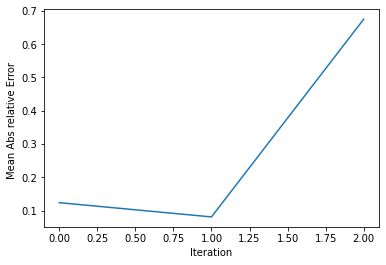

In [7]:
import matplotlib.pyplot as plt
if os.path.isdir(path+'figs')==False:
    os.mkdir(path+'figs') 
# plot the absolute relative error
df_err = pd.read_csv(file_name_error, sep = ',', header = None) 
err_np = df_err.to_numpy()
rc_m= np.tile(real_cons[:len(err_np[0,:])] , [err_np.shape[0],1])
#print(rc_m.shape)
mean_err = np.mean(abs(err_np), axis = 1)
# mean_err.shape
real_abs = abs(err_np/rc_m)
mean_rel_abs = np.mean(real_abs, axis = 1)
# mean_err = np.mean(abs(err_np), axis = 1)
plt.plot(range(len(mean_rel_abs) ), mean_rel_abs)
plt.ylabel('Mean Abs relative Error ')
plt.xlabel('Iteration')
# plt.title('Iteration[1:]')
plt.savefig(path+'figs/error.png')
print('saved figure')
# save error array 
np.save(path+'mean_abs_error.npy', mean_rel_abs)
# plot the lagrange multipliers 

# plot the parameters 

# store the absolute relative error array 

